Hace falta algo que indique con qué entorno vamos a trabajar

Importar lo que hace falta

In [2]:
import pandas as pd
import numpy as np

In [3]:
data_url = "../Data/properatti.csv"

In [4]:
data = pd.read_csv(data_url, encoding="utf-8")

In [5]:
data.shape

(121220, 26)

Confirmar los valores de la serie 'currency'

In [6]:
data['currency'].value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

Retenemos sólo las observaciones que correspondan a 'USD'

In [7]:
data = data[data['currency'] == 'USD']

In [8]:
data.shape

(87587, 26)

Determinar si la serie 'price' es igual que 'price_aprox_usd'
La suma de valores True debe ser igual a la cantidad de observaciones

In [9]:
sum(data['price'] == data['price_aprox_usd'])

87587

No hacen falta las series currency, price_aprox_local_currency y price_aprox_usd

In [10]:
data = data.drop(['currency', 'price_aprox_local_currency', 'price_aprox_usd'], axis='columns')

In [11]:
data.shape

(87587, 23)

In [12]:
data.isnull().sum()

Unnamed: 0                     0
operation                      0
property_type                  0
place_name                    23
place_with_parent_names        0
country_name                   0
state_name                     0
geonames_id                16141
lat-lon                    35051
lat                        35051
lon                        35051
price                          0
surface_total_in_m2        27267
surface_covered_in_m2      10355
price_usd_per_m2           27454
price_per_m2               10357
floor                      81278
rooms                      51573
expenses                   74935
properati_url                  0
description                    1
title                          0
image_thumbnail             1542
dtype: int64

Determinar que ocurre con price y surface

---

Hasta aquí se copia de TP1.01

---

In [13]:
work1 = data[data['surface_total_in_m2'].notnull() & (data['surface_total_in_m2'] > 1)]

In [14]:
work1.shape

(60133, 23)

In [15]:
sum(round(work1['price_usd_per_m2'],2) != round(work1['price'] / work1['surface_total_in_m2'],2))

0

Hasta aquí determinamos que hay valores de superficie menores o iguales a cero 

Determinamos que el price_usd_per_m2 está calculado de los otros valores válidos

Hay que hacer lo mismo con los valores para metros cubiertos ...

In [16]:
import seaborn as sns

In [17]:
data['price'].describe()

count    8.758700e+04
mean     2.603735e+05
std      4.063580e+05
min      5.000000e+03
25%      1.000000e+05
50%      1.600000e+05
75%      2.900000e+05
max      4.654544e+07
Name: price, dtype: float64

In [18]:
data['price']

0          62000.0
1         150000.0
2          72000.0
3          95000.0
4          64000.0
            ...   
121215    870000.0
121216    498000.0
121217    131500.0
121218     95900.0
121219    129000.0
Name: price, Length: 87587, dtype: float64

In [19]:
RSI=data['price'].describe()["75%"]-data['price'].describe()["25%"]
max_value=data['price'].describe()["75%"]+1.5*RSI
min_value=data['price'].describe()["25%"]-1.5*RSI
print(max_value, min_value)

575000.0 -185000.0


In [20]:
mask=np.logical_and(data['price']>=min_value, data['price']<=max_value)
mask=np.logical_and(mask, data['surface_total_in_m2']<=600)
data_filtrado=data[mask]

In [21]:
data_filtrado.shape

(52419, 23)

In [22]:
data.shape

(87587, 23)

In [23]:
data_filtrado['price'].describe()

count     52419.000000
mean     185803.166581
std      117734.410264
min        5500.000000
25%       96000.000000
50%      149000.000000
75%      245050.000000
max      575000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='surface_total_in_m2', ylabel='price'>

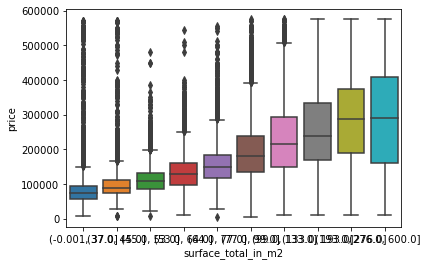

In [24]:
sns.boxplot(x=pd.qcut(x=data_filtrado['surface_total_in_m2'], q=10), y=data_filtrado['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

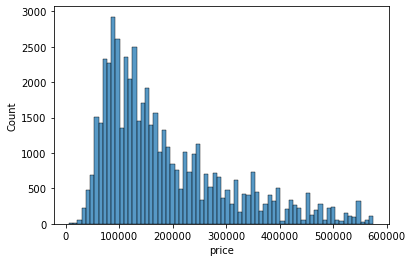

In [25]:
sns.histplot(data=data_filtrado, x=data_filtrado['price'])

In [26]:
data_filtrado[['price', 'surface_total_in_m2']].corr()

,price,surface_total_in_m2
price,1.000000,0.522232
surface_total_in_m2,0.522232,1.000000


<AxesSubplot:xlabel='surface_total_in_m2', ylabel='price'>

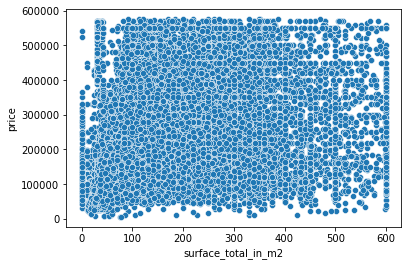

In [27]:
sns.scatterplot(x=data_filtrado['surface_total_in_m2'], y=data_filtrado['price'])

In [28]:
mask=np.logical_and(data['price']>=min_value, data['price']<=max_value)
data_filtrado=data[mask]

In [29]:
mask1=np.logical_and(data_filtrado['state_name']=='Capital Federal', data_filtrado['property_type']=='apartment')
data_filtrado=data_filtrado[mask1]

<AxesSubplot:xlabel='surface_total_in_m2', ylabel='price'>

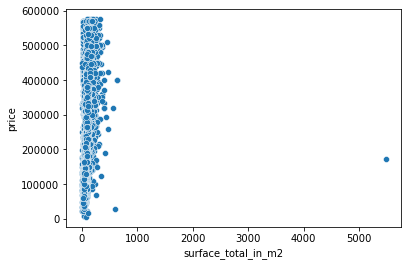

In [36]:
sns.scatterplot(x=data_filtrado['surface_total_in_m2'], y=data_filtrado['price'])

In [39]:
data_filtrado['surface_total_in_m2'].describe()

count    17136.000000
mean        68.383929
std         59.159609
min          0.000000
25%         40.000000
50%         55.000000
75%         81.000000
max       5483.000000
Name: surface_total_in_m2, dtype: float64

In [31]:
data_filtrado[['price', 'surface_total_in_m2']].corr()

,price,surface_total_in_m2
price,1.000000,0.489202
surface_total_in_m2,0.489202,1.000000


In [32]:
#La mejor hasta ahora!!

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price'>

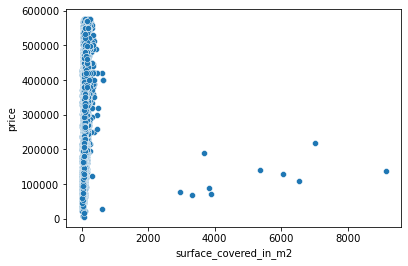

In [33]:
sns.scatterplot(x=data_filtrado['surface_covered_in_m2'], y=data_filtrado['price'])

In [35]:
data_filtrado.dtypes

Unnamed: 0                   int64
operation                   object
property_type               object
place_name                  object
place_with_parent_names     object
country_name                object
state_name                  object
geonames_id                float64
lat-lon                     object
lat                        float64
lon                        float64
price                      float64
surface_total_in_m2        float64
surface_covered_in_m2      float64
price_usd_per_m2           float64
price_per_m2               float64
floor                      float64
rooms                      float64
expenses                   float64
properati_url               object
description                 object
title                       object
image_thumbnail             object
dtype: object